In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint # to save the model in particular epoch

In [4]:
image_generator_train = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range = 0.1,
    zoom_range = 0.3,
)

image_generator_test = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_data = image_generator_train.flow_from_directory(
    'train_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

In [ ]:
test_data = image_generator_test.flow_from_directory(
    'test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=50
)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

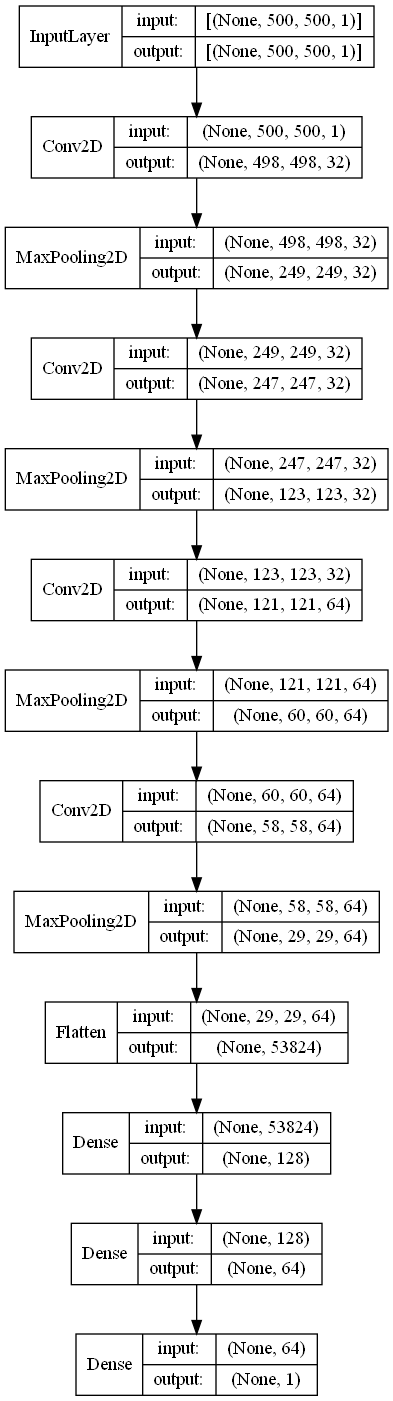

In [9]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_data.classes

In [ ]:
weights = compute_class_weight('balanced', np.unique(train_data.classes), train_data.classes)

In [ ]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [ ]:
class_weights

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [ ]:
mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [ ]:
history = model.fit(train_data, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test), epochs=30, callbacks=[es, rlrop, mch], class_weight=class_weights)

In [ ]:
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')